In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import eikon as ek
import pandas as pd
import os
import json
from data_retrieval import vertical_download, reconstruction, download_indicators, dfs_list_from_dir

In [3]:
with open('data/stoxx600_constituents_list.json','r') as file:
    constituents_list = json.load(file)

In [4]:
len(constituents_list)

1825

In [100]:
instruments_list = constituents_list[:5]
#las funciones de eikon a descargar
fields_list = [#'TR.EBITDA',
               'TR.Volume']
#parametros de la funcion
parameters = {'SDate':'2000-01-01','EDate':'2023-01-01','Frq':'Q','Period':'FI-3','Curn':'EUR'}
#directorio en el que guardar los datos
dir_fp = r'C:\Users\hugo.perezdealbeniz\Documents\GitHub\ranking_DIP_european_equities\data_retrieval\data'

In [101]:
#import time
#time.sleep(32272)

download_indicators(fields_list,instruments_list,parameters,dir_fp)

100%|██████████| 5/5 [00:03<00:00,  1.31it/s]
0it [00:00, ?it/s]


In [34]:
dfs_list = dfs_list_from_dir(r'C:\Users\hugo.perezdealbeniz\Documents\GitHub\ranking_DIP_european_equities\data_retrieval\data\EBITDASmartEstFwdYrGrowth(0)\raw_data')

EBITDA
EBITDA(0)
EBITDA(1)
EBITDAMarginPercent
EBITDAMarginPercent(0)
EBITDAMarginPercent(0)(1)
EBITDAMarginPercent(1)
EBITDAMarginPercent(2)
EBITDASmartEstFwdYrGrowth(6)
EBITDASmartEstFwdYrGrowth(7)
Volume(1)
Volume(2)
Volume(3)
Volume(4)
Volume(5)
Volume(6)
Volume(7)


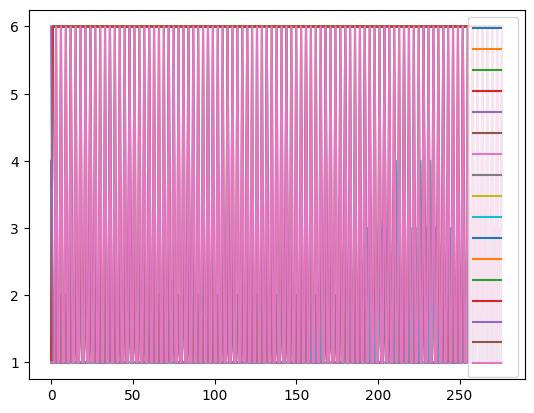

In [103]:
for index,i in enumerate(os.listdir(dir_fp)):
    if index > 40:# or i=='PriceToTangBVPerShare':
        continue
    try:
        df = pd.read_csv(dir_fp+f'/{i}/{i}.csv')
    except FileNotFoundError:
        continue
    print(i)
    df.notna().sum(axis=1).plot(legend=True)